In [12]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.metrics.cluster import silhouette_score
from preprocessing import preprocess,get_labels
#Clustering Functions
from isaac.kernel_density import kde_outliers

# For plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
sns.set_theme(
    context = 'notebook',
    style = 'whitegrid'
)

In [14]:
# Change to dataset path
df = pd.read_csv("data/plant_health_data.csv")
X = preprocess(df, attr = [])
y = get_labels(df)
X.head()

,Soil_Moisture,Ambient_Temperature,Soil_Temperature,Humidity,Light_Intensity,Soil_pH,Nitrogen_Level,Phosphorus_Level,Potassium_Level,Chlorophyll_Content,Electrochemical_Signal
Timestamp,,,,,,,,,,,
2024-10-03 10:54:53.407995,0.278321,-0.511285,0.662825,0.049963,-0.247408,-1.620166,-1.746638,1.355983,0.768579,0.108796,-0.080646
2024-10-03 16:54:53.407995,-1.184139,-0.666361,-0.435676,1.035845,-0.072300,1.051744,0.052635,-0.424888,-1.043216,-0.770972,-1.431377
2024-10-03 22:54:53.407995,-0.924655,-0.819209,-1.557519,1.478694,-0.094261,-1.491368,-0.066879,-0.234739,0.479665,1.015220,0.163452
2024-10-04 04:54:53.407995,-1.126428,-0.408656,0.962382,0.380088,-1.626583,-1.615750,-1.141667,-0.356286,-0.330470,0.352435,0.344986
2024-10-04 10:54:53.407995,1.696462,1.433049,-0.633556,1.015672,-0.736748,-1.039349,-1.664853,0.666060,0.646682,1.542359,1.082045


In [15]:
pca = PCA(n_components = 2)
in_2d = pca.fit_transform(X) 
in_2d = pd.DataFrame(data = in_2d, index = X.index, columns = ['PC1', 'PC2'])

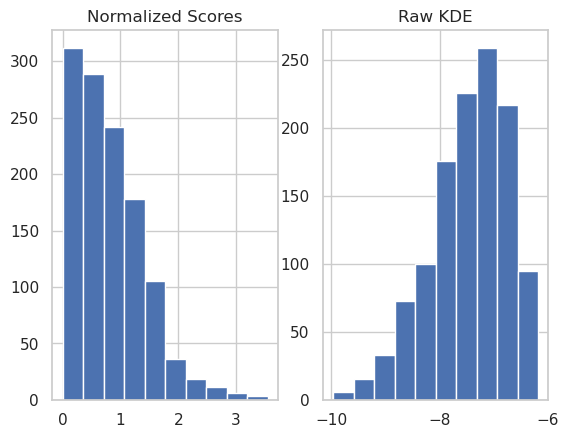

In [22]:
kde_bin, kde_probs, kde_scores = kde_outliers(X)
plt.subplot(121)
plt.title('Normalized Scores')
plt.hist(kde_probs)
plt.subplot(122)
plt.title('Raw KDE')
plt.hist(kde_scores)
plt.show()

In [ ]:
Most of our data lies in similar regions of density.  There are no obvious outliers in our dataset

Text(0.5, 1.0, 'KDE Outliers')

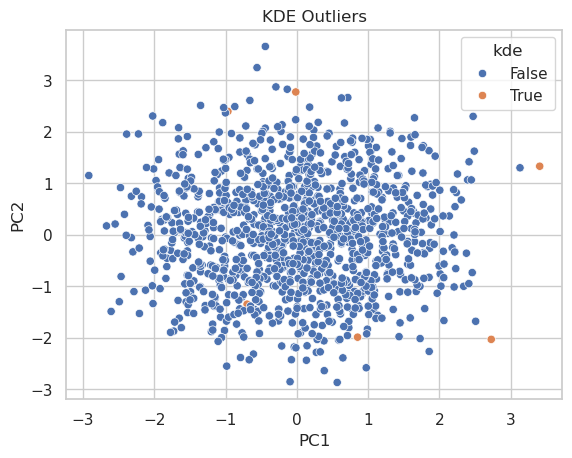

In [17]:
in_2d['kde'] = kde_bin
sns.scatterplot(in_2d, x = 'PC1', y = 'PC2', hue = 'kde')
plt.title('KDE Outliers')